In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.0850

Best Fitness:	1400.4135
Solution:	1400.0000
Diff:		0.4135

[0:01:18][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.6920

Best Fitness:	1400.4838
Solution:	1400.0000
Diff:		0.4838

[0:02:19][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1402.7455

Best Fitness:	1400.3558
Solution:	1400.0000
Diff:		0.3558

[0:02:54][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1402.8745

Best Fitness:	1400.4345
Solution:	1400.0000
Diff:		0.4345

[0:03:33][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.7313

Best Fitness:	1400.6447
Solution:	1400.0000
Diff:		0.6447

[0:04:15][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.5729

Best Fitness:	1400.4846
Solution:	1400.0000
Diff:		0.4846

[0:05:00][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.3376

Best Fitness:	1400.5497
Solution:	1400.0000
Diff:		0.5497

[0:05:37][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.0782

Best Fitness:	1400.4928
Solution:	1400.0000
Diff:		0.4928

[0:06:20][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.0882

Best Fitness:	1400.4131
Solution:	1400.0000
Diff:		0.4131

[0:06:58][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.1342

Best Fitness:	1400.3787
Solution:	1400.0000
Diff:		0.3787

[0:07:39][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3232

Best Fitness:	1400.8586
Solution:	1400.0000
Diff:		0.8586

[0:08:23][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3578

Best Fitness:	1400.4104
Solution:	1400.0000
Diff:		0.4104

[0:09:04][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.0532

Best Fitness:	1400.5102
Solution:	1400.0000
Diff:		0.5102

[0:09:42][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.8056

Best Fitness:	1400.4758
Solution:	1400.0000
Diff:		0.4758

[0:10:22][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3162

Best Fitness:	1400.4438
Solution:	1400.0000
Diff:		0.4438

[0:11:17][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.0146

Best Fitness:	1400.7645
Solution:	1400.0000
Diff:		0.7645

[0:11:57][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.4471

Best Fitness:	1400.6397
Solution:	1400.0000
Diff:		0.6397

[0:12:40][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1402.5818

Best Fitness:	1400.4540
Solution:	1400.0000
Diff:		0.4540

[0:13:33][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.5956

Best Fitness:	1400.5588
Solution:	1400.0000
Diff:		0.5588

[0:14:22][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3047

Best Fitness:	1400.5103
Solution:	1400.0000
Diff:		0.5103

[0:14:58][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3499

Best Fitness:	1400.3974
Solution:	1400.0000
Diff:		0.3974

[0:15:43][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.7832

Best Fitness:	1400.4575
Solution:	1400.0000
Diff:		0.4575

[0:16:22][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.5217

Best Fitness:	1400.4068
Solution:	1400.0000
Diff:		0.4068

[0:17:06][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.7195

Best Fitness:	1400.3607
Solution:	1400.0000
Diff:		0.3607

[0:17:42][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.6506

Best Fitness:	1400.3118
Solution:	1400.0000
Diff:		0.3118

[0:18:27][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.6834

Best Fitness:	1400.4142
Solution:	1400.0000
Diff:		0.4142

[0:19:07][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.3280

Best Fitness:	1400.5479
Solution:	1400.0000
Diff:		0.5479

[0:20:03][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.2361

Best Fitness:	1400.3226
Solution:	1400.0000
Diff:		0.3226

[0:20:39][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.5779

Best Fitness:	1400.3528
Solution:	1400.0000
Diff:		0.3528

[0:21:31][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.2458

Best Fitness:	1400.5684
Solution:	1400.0000
Diff:		0.5684

[0:22:15][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1405.0556

Best Fitness:	1400.6924
Solution:	1400.0000
Diff:		0.6924

[0:23:12][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.0843

Best Fitness:	1400.4851
Solution:	1400.0000
Diff:		0.4851

[0:23:43][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.1621

Best Fitness:	1400.5014
Solution:	1400.0000
Diff:		0.5014

[0:24:23][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.6774

Best Fitness:	1400.5252
Solution:	1400.0000
Diff:		0.5252

[0:25:10][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.4257

Best Fitness:	1400.4089
Solution:	1400.0000
Diff:		0.4089

[0:25:57][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.6745

Best Fitness:	1400.4987
Solution:	1400.0000
Diff:		0.4987

[0:26:43][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.1019

Best Fitness:	1400.5776
Solution:	1400.0000
Diff:		0.5776

[0:27:29][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.0590

Best Fitness:	1400.5881
Solution:	1400.0000
Diff:		0.5881

[0:28:03][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1405.1248

Best Fitness:	1400.7223
Solution:	1400.0000
Diff:		0.7223

[0:28:51][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.2738

Best Fitness:	1400.4742
Solution:	1400.0000
Diff:		0.4742

[0:29:31][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1404.4408

Best Fitness:	1400.7638
Solution:	1400.0000
Diff:		0.7638

[0:30:15][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.0073

Best Fitness:	1400.4750
Solution:	1400.0000
Diff:		0.4750

[0:31:00][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.4752

Best Fitness:	1400.2656
Solution:	1400.0000
Diff:		0.2656

[0:31:40][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.8850

Best Fitness:	1400.4649
Solution:	1400.0000
Diff:		0.4649

[0:32:19][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.8673

Best Fitness:	1400.3320
Solution:	1400.0000
Diff:		0.3320

[0:33:03][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.4357

Best Fitness:	1400.6738
Solution:	1400.0000
Diff:		0.6738

[0:33:54][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.1629

Best Fitness:	1400.4280
Solution:	1400.0000
Diff:		0.4280

[0:34:35][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1402.6966

Best Fitness:	1400.4774
Solution:	1400.0000
Diff:		0.4774

[0:35:15][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.6698

Best Fitness:	1400.6177
Solution:	1400.0000
Diff:		0.6177

[0:36:03][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.3381

Best Fitness:	1400.3809
Solution:	1400.0000
Diff:		0.3809

[0:37:03][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1403.4631

Best Fitness:	1400.4517
Solution:	1400.0000
Diff:		0.4517

[0:37:56][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:37:56

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,5.576766,3.463247,2.084276,3.883730,3.571035,3.433752,5.907703,6.142994,4.465627,3.812161,...,3.918712,5.757113,2.708668,4.360973,4.758209,10.422218,1.095084,3.618139,3.258514,50
28,3.460460,0.916841,2.084276,3.020951,3.571035,3.433752,5.907703,5.579222,4.465627,3.812161,...,3.918712,5.757113,2.708668,4.360973,4.758209,10.422218,1.095084,3.618139,3.258514,50
29,3.460460,0.916841,2.084276,3.020951,3.571035,3.433752,5.907703,5.579222,4.465627,3.812161,...,3.918712,5.757113,2.708668,4.360973,4.758209,9.412485,1.095084,3.618139,2.314000,50
30,3.460460,0.916841,2.084276,3.020951,3.571035,2.467206,5.907703,5.579222,4.465627,3.812161,...,3.918712,5.757113,2.708668,4.360973,4.758209,9.412485,1.095084,3.095955,2.314000,50
31,3.460460,0.916841,2.084276,3.020951,3.571035,2.467206,2.551440,5.579222,4.465627,3.812161,...,3.918712,2.816219,2.708668,3.617120,4.758209,5.857536,1.095084,3.095955,2.314000,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.41351741557605237

Best error for run 1: 0.4837630480549251

Best error for run 2: 0.35575497917898247

Best error for run 3: 0.4344871518817399

Best error for run 4: 0.6447390132295823

Best error for run 5: 0.48461376375757936

Best error for run 6: 0.5497033747772093

Best error for run 7: 0.49275466005860835

Best error for run 8: 0.41311933476936247

Best error for run 9: 0.37874470390238457

Best error for run 10: 0.8586482456685189

Best error for run 11: 0.4103557150042434

Best error for run 12: 0.5102058682207371

Best error for run 13: 0.47579949032137847

Best error for run 14: 0.4438234115193609

Best error for run 15: 0.7644899216600152

Best error for run 16: 0.6397371997329628

Best error for run 17: 0.45396433350811094

Best error for run 18: 0.5588314008446105

Best error for run 19: 0.5103175471510895

Best error for run 20: 0.3974309924146837

Best error for run 21: 0.45745463210073467

Best error for run 22: 0.40684268081031405

Best error for run 23: 0.36065583978847826

Best error for run 24: 0.3118490016033775

Best error for run 25: 0.4142203410174261

Best error for run 26: 0.5479065296108274

Best error for run 27: 0.3226449912456246

Best error for run 28: 0.3528064396023183

Best error for run 29: 0.5683548005656576

Best error for run 30: 0.6923747200121397

Best error for run 31: 0.48511672006998197

Best error for run 32: 0.5014378038274572

Best error for run 33: 0.5252239938242838

Best error for run 34: 0.40890368611871963

Best error for run 35: 0.4986757181848134

Best error for run 36: 0.5775803431922668

Best error for run 37: 0.5880686443545073

Best error for run 38: 0.7222935309991954

Best error for run 39: 0.474187281284685

Best error for run 40: 0.7637867205921793

Best error for run 41: 0.47499223094132503

Best error for run 42: 0.26555145254815216

Best error for run 43: 0.4649432067419639

Best error for run 44: 0.3320124144299825

Best error for run 45: 0.673825402843022

Best error for run 46: 0.4280437451211583

Best error for run 47: 0.4774157323035979

Best error for run 48: 0.6176687472257072

Best error for run 49: 0.38090365660991665

Best error for run 50: 0.45169305160720796

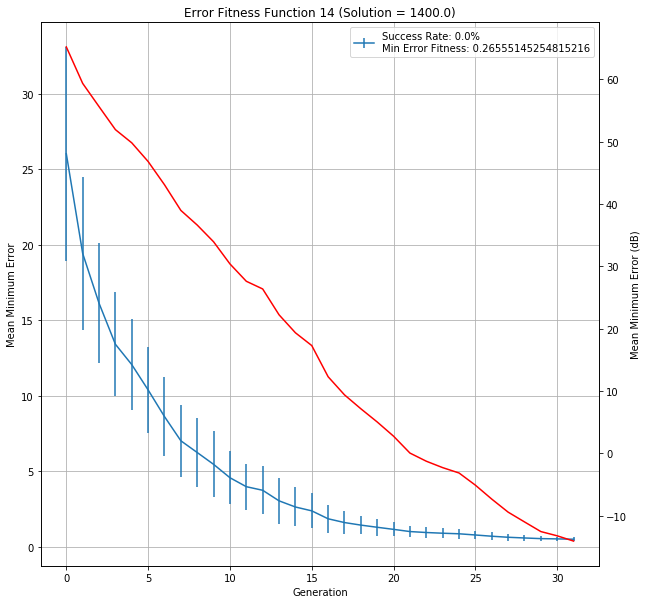

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.1,0.413517,0.483763,0.355755,0.434487,0.644739,0.484614,...,0.332012,0.673825,0.428044,0.477416,0.617669,0.380904,0.451693,0.494554,0:37:56,10200
